In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
# PyNeb contains a huge list of emission lines:
pn.LINE_LABEL_LIST

{'H1r': ['1216A',
  '1026A',
  '973A',
  '6563A',
  '4861A',
  '4341A',
  '4102A',
  '3970A',
  '3889A',
  '3835A',
  '3798A',
  '1.87m',
  '1.28m',
  '1.09m',
  '9546A',
  '9229A'],
 'He1r': ['5876A',
  '2945A',
  '3188A',
  '3614A',
  '3889A',
  '3965A',
  '4026A',
  '4121A',
  '4388A',
  '4438A',
  '4471A',
  '4713A',
  '4922A',
  '5016A',
  '5048A',
  '5876A',
  '6678A',
  '7065A',
  '7281A',
  '9464A',
  '10830A',
  '11013A',
  '11969A',
  '12527A',
  '12756A',
  '12785A',
  '12790A',
  '12846A',
  '12968A',
  '12985A',
  '13412A',
  '15084A',
  '17003A',
  '18556A',
  '18685A',
  '18697A',
  '19089A',
  '19543A',
  '20425A',
  '20581A',
  '20602A',
  '21120A',
  '21132A',
  '21608A',
  '21617A'],
 'He2r': ['1640A',
  '1215A',
  '1084A',
  '4686A',
  '3203A',
  '6560A',
  '5411A',
  '4859A',
  '4541A',
  '6407A',
  '4198A'],
 '3He2': ['3.50c'],
 'Al2': ['2674A',
  '2670A',
  '2661A',
  '1671A',
  '4451A',
  '4463A',
  '4488A',
  '164.2m',
  '54.1m',
  '80.7m'],
 'Ar2': ['7.0m'],
 

## Analysis plot of a simple two-component model, meant to illustrate the bias arising from assuming that the region is homogeneous in density.

## First, an emission region made up of two different subregions is modelled, each with a different mass and density. The resulting overall emissivity is computed.

## Secondly, the region is analyzed as if it were a homogeneous region.


In [3]:
from pyneb.utils.misc import parseAtom

def plot_2comp(tem1=1e4, tem2=1e4, dens1=3e2, dens2=5e5, mass1=1, mass2=5e-4, NLevels=8):
        
    # List of diagnostics used to analyze the region
    diags = pn.Diagnostics(NLevels=NLevels)
    
    diags.addDiag(['[NI] 5198/5200',
                   '[NII] 5755/6548',
                    '[OII] 3726/3729',
                    '[OIII] 4363/5007', 
                    '[ArIII] 5192/7136',
                    '[ArIII] 5192/7300+',
                    '[ArIV] 4740/4711',
                    '[ArIV] 7230+/4720+',
                    '[SII] 6731/6716', 
                    '[SII] 4072+/6720+',
                    '[SIII] 6312/9069',
                    '[ClIII] 5538/5518'
                    ])
            
    diags.addClabel('[SIII] 6312/9069', '[SIII]A')
    diags.addClabel('[OIII] 4363/5007', '[OIII]A')
        
    # Define all the ions that are involved in the diagnostics
    adict = diags.atomDict
    pn.log_.message('Atoms built')
    
    obs = pn.Observation(corrected = True)
    for atom in adict:
        # Computes all the intensities of all the lines of all the ions considered
         for line in pn.LINE_LABEL_LIST[atom]:
            if line[-1] == 'm':
                wavelength = float(line[:-1])*1e4
            else:
                wavelength = float(line[:-1])
            # Test if wavelength is actually in the current atom. It may not be the case if not enough levels are considered.
            i, j = adict[atom].getTransition(wavelength)
            if (adict[atom].wave_Ang[i-1, j-1] - wavelength)/wavelength < 0.05 : 
                elem, spec = parseAtom(atom)
                try:      
                    intens1 = adict[atom].getEmissivity(tem1, dens1, wave = wavelength) * dens1 * mass1
                    intens2 = adict[atom].getEmissivity(tem2, dens2, wave = wavelength) * dens2 * mass2
                    obs.addLine(pn.EmissionLine(elem, spec, wavelength,
                                             obsIntens=[intens1, intens2, intens1+intens2], 
                                             obsError=[0.0, 0.0, 0.0]))
                except:
                    print('!!! {} {} {}'.format(elem, spec, wavelength))
    pn.log_.message('Virtual observations computed')
    emisgrids = pn.getEmisGridDict(atomDict=adict)
    
    pn.log_.message('EmisGrids available')
    
    # Produce a diagnostic plot for each of the two regions and another one for the 
    # (misanalyzed) overall region
    f, axes = plt.subplots(3,1, figsize=(10,15))
    for i_obs in (0,1,2):
        diags.plot(emisgrids, obs, i_obs=i_obs, ax=axes[i_obs])



ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (6-1). Consider changing the atomic data
!!! O 2 834.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (6-2). Consider changing the atomic data
!!! O 2 1075.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (6-5). Consider changing the atomic data
!!! O 2 1260.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (8-1). Consider changing the atomic data
!!! O 2 833.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (7-2). Consider changing the atomic data
!!! O 2 1073.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (7-5). Consider changing the atomic data
!!! O 2 1258.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissivity (8-1). Consider changing the atomic data
!!! O 2 833.0
ERROR Atom O2: The number of levels 5 does not allow getting this emissi

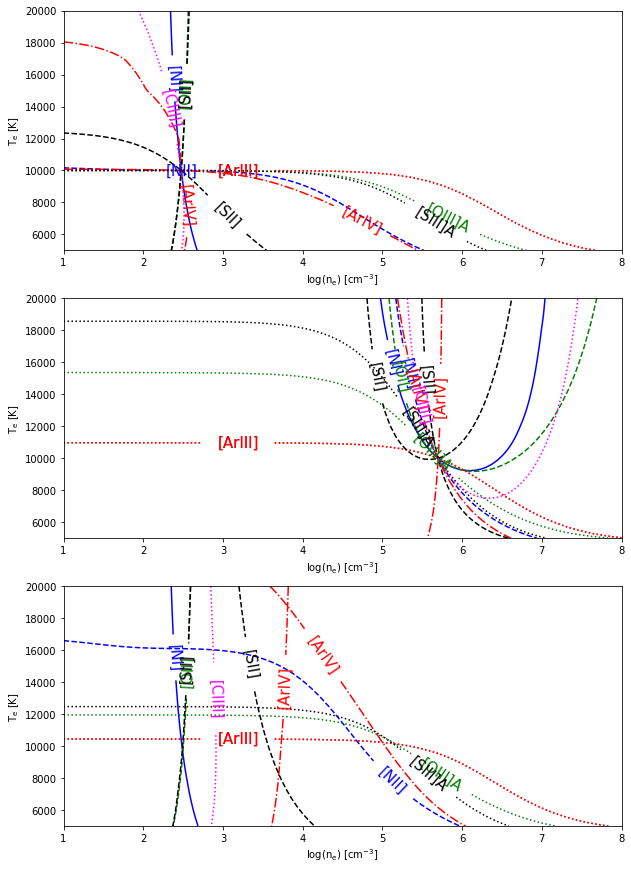

In [4]:
plot_2comp(tem1=1e4, tem2=1e4, dens1=3e2, dens2=5e5, mass1=1, mass2=5e-4, NLevels=8)

### This example is only illustrative. The ionic fractions of the elements are not considered here. A more correct treatment (for planetary nebulae) of the problem using photoionisation models is presented in http://adsabs.harvard.edu/abs/2017IAUS..323...43M